In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [7]:
df = pd.read_csv("/kaggle/input/real-estate-sales-2001-2021-gl/Real_Estate_Sales_2001-2021_GL.csv")

In [8]:
df.head(2)

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
0,2020348,2020,09/13/2021,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.4630,Commercial,NaN,NaN,NaN,NaN,NaN
1,20002,2020,10/02/2020,Ashford,390 TURNPIKE RD,253000.0,430000.0,0.5883,Residential,Single Family,NaN,NaN,NaN,NaN


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054159 entries, 0 to 1054158
Data columns (total 14 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Serial Number     1054159 non-null  int64  
 1   List Year         1054159 non-null  int64  
 2   Date Recorded     1054157 non-null  object 
 3   Town              1054159 non-null  object 
 4   Address           1054108 non-null  object 
 5   Assessed Value    1054159 non-null  float64
 6   Sale Amount       1054159 non-null  float64
 7   Sales Ratio       1054159 non-null  float64
 8   Property Type     671713 non-null   object 
 9   Residential Type  660275 non-null   object 
 10  Non Use Code      302242 non-null   object 
 11  Assessor Remarks  161472 non-null   object 
 12  OPM remarks       11564 non-null    object 
 13  Location          254643 non-null   object 
dtypes: float64(3), int64(2), object(9)
memory usage: 112.6+ MB


In [10]:
df.isnull().sum()

Serial Number             0
List Year                 0
Date Recorded             2
Town                      0
Address                  51
Assessed Value            0
Sale Amount               0
Sales Ratio               0
Property Type        382446
Residential Type     393884
Non Use Code         751917
Assessor Remarks     892687
OPM remarks         1042595
Location             799516
dtype: int64

In [11]:
df.describe()

,Serial Number,List Year,Assessed Value,Sale Amount,Sales Ratio
count,1.054159e+06,1.054159e+06,1.054159e+06,1.054159e+06,1.054159e+06
mean,5.027140e+05,2.010774e+03,2.797416e+05,3.990286e+05,9.953241e+00
std,7.230239e+06,6.540711e+00,1.650117e+06,5.229758e+06,1.838434e+03
min,0.000000e+00,2.001000e+03,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.055200e+04,2.004000e+03,8.845000e+04,1.422000e+05,4.816008e-01
50%,8.008000e+04,2.011000e+03,1.395800e+05,2.300000e+05,6.162887e-01
75%,1.608155e+05,2.017000e+03,2.270000e+05,3.700000e+05,7.764000e-01
max,2.000500e+09,2.021000e+03,8.815100e+08,5.000000e+09,1.226420e+06


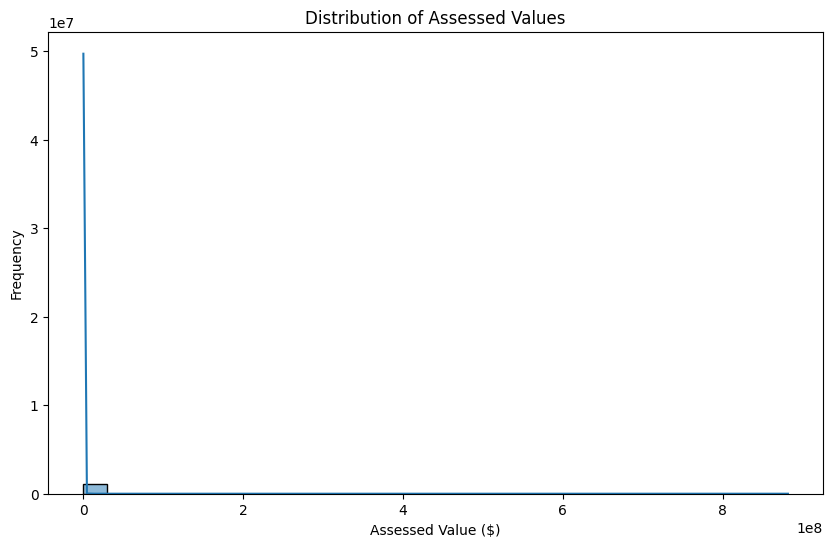

In [19]:
# Distribution of Assessed Values
plt.figure(figsize=(10, 6))
sns.histplot(df['Assessed Value'], bins=30, kde=True)
plt.title('Distribution of Assessed Values')
plt.xlabel('Assessed Value ($)')
plt.ylabel('Frequency')
plt.show()

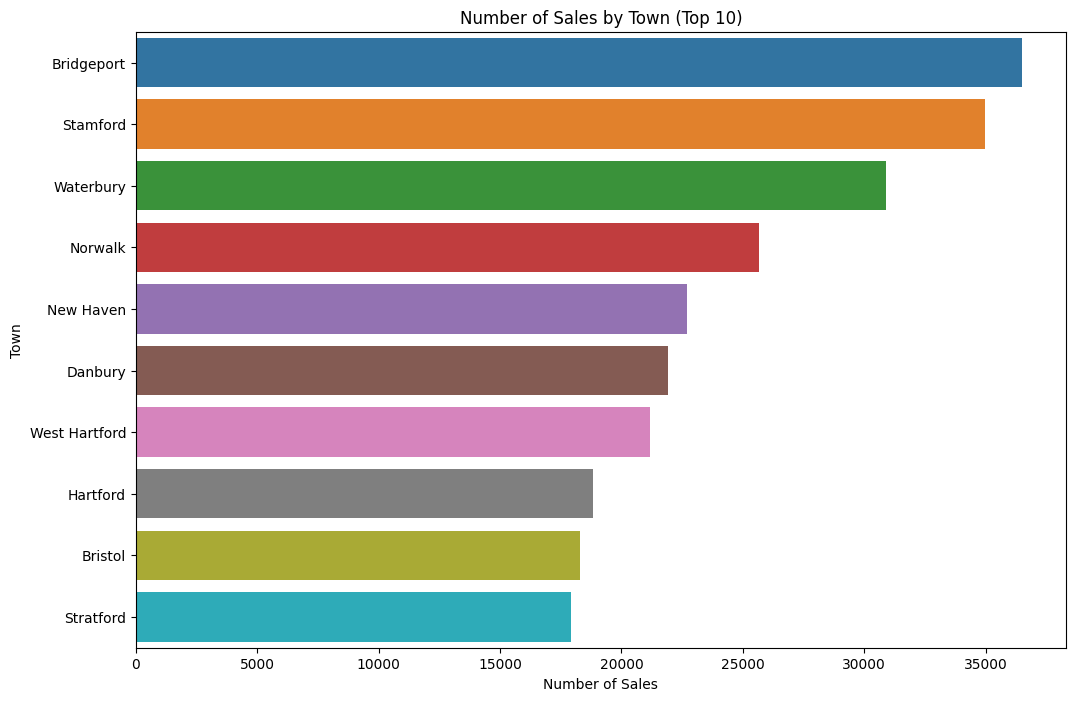

In [20]:
# Number of Sales by Town
plt.figure(figsize=(12, 8))
sns.countplot(y='Town', data=df, order=df['Town'].value_counts().index[:10])
plt.title('Number of Sales by Town (Top 10)')
plt.xlabel('Number of Sales')
plt.ylabel('Town')
plt.show()

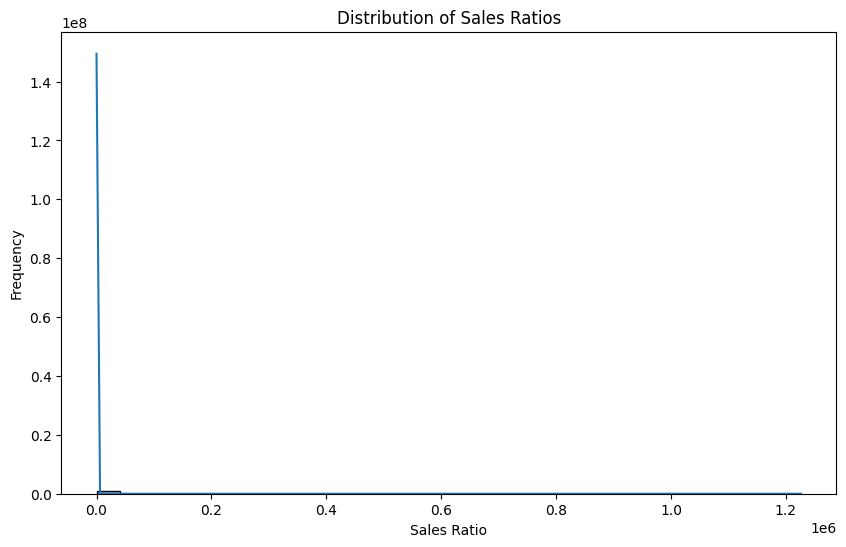

In [22]:
# Sales Ratio Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Sales Ratio'], bins=30, kde=True)
plt.title('Distribution of Sales Ratios')
plt.xlabel('Sales Ratio')
plt.ylabel('Frequency')
plt.show()

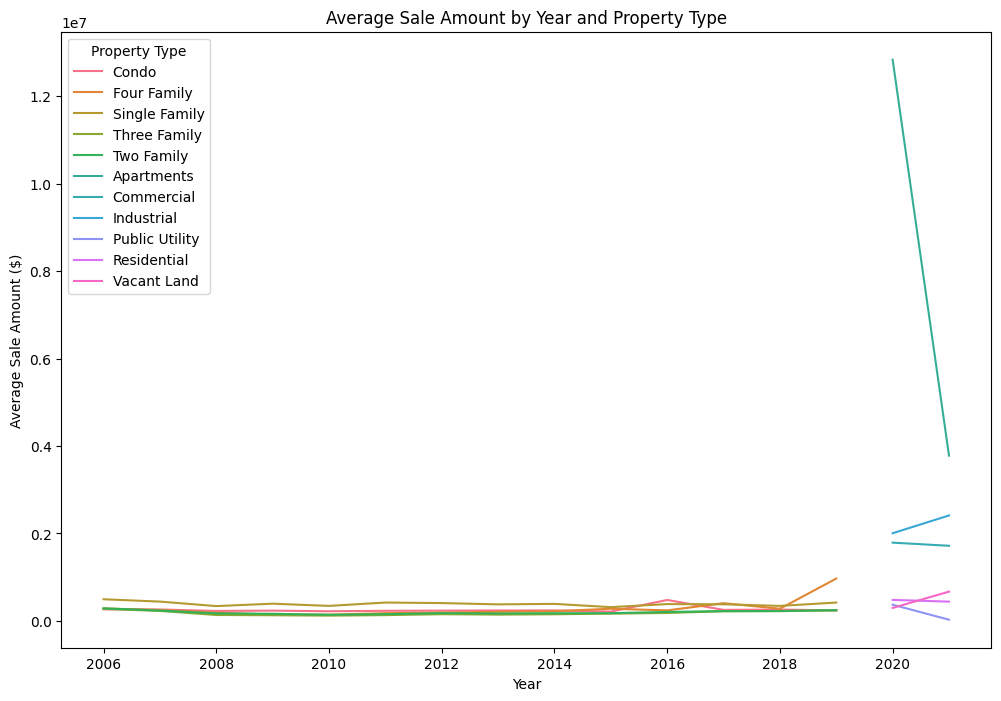

In [23]:
# Average Sale Amount by Year and Property Type
plt.figure(figsize=(12, 8))
sns.lineplot(x='List Year', y='Sale Amount', hue='Property Type', data=df.groupby(['List Year', 'Property Type'])['Sale Amount'].mean().reset_index())
plt.title('Average Sale Amount by Year and Property Type')
plt.xlabel('Year')
plt.ylabel('Average Sale Amount ($)')
plt.legend(title='Property Type')
plt.show()

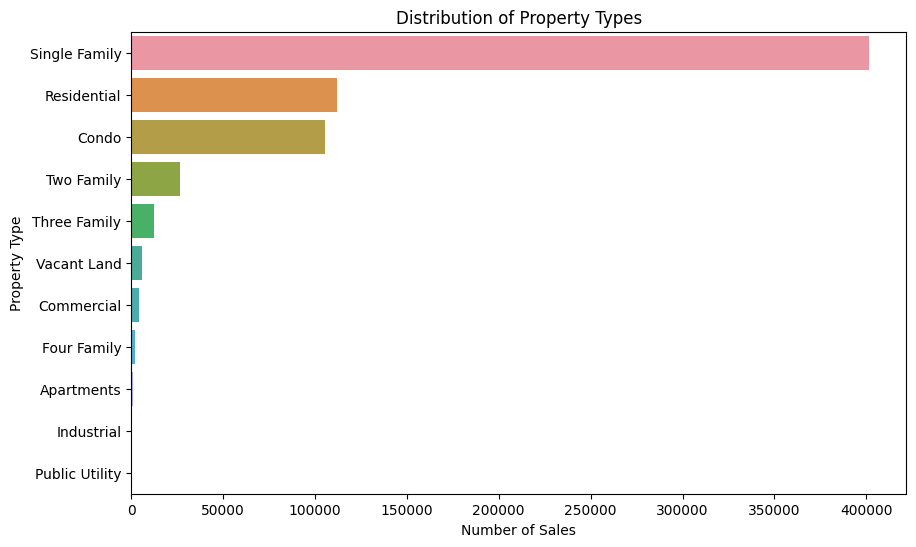

In [24]:
# Property Type Distribution
plt.figure(figsize=(10, 6))
sns.countplot(y='Property Type', data=df, order=df['Property Type'].value_counts().index)
plt.title('Distribution of Property Types')
plt.xlabel('Number of Sales')
plt.ylabel('Property Type')
plt.show()

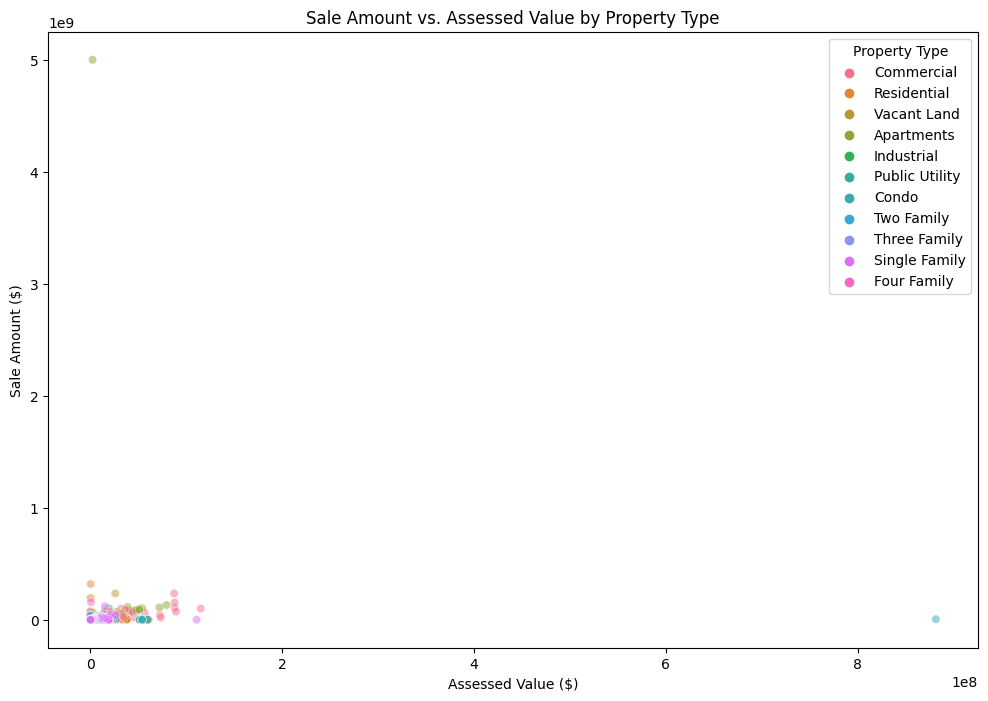

In [26]:
# Sale Amount vs. Assessed Value by Property Type
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Assessed Value', y='Sale Amount', hue='Property Type', data=df, alpha=0.5)
plt.title('Sale Amount vs. Assessed Value by Property Type')
plt.xlabel('Assessed Value ($)')
plt.ylabel('Sale Amount ($)')
plt.legend(title='Property Type')
plt.show()

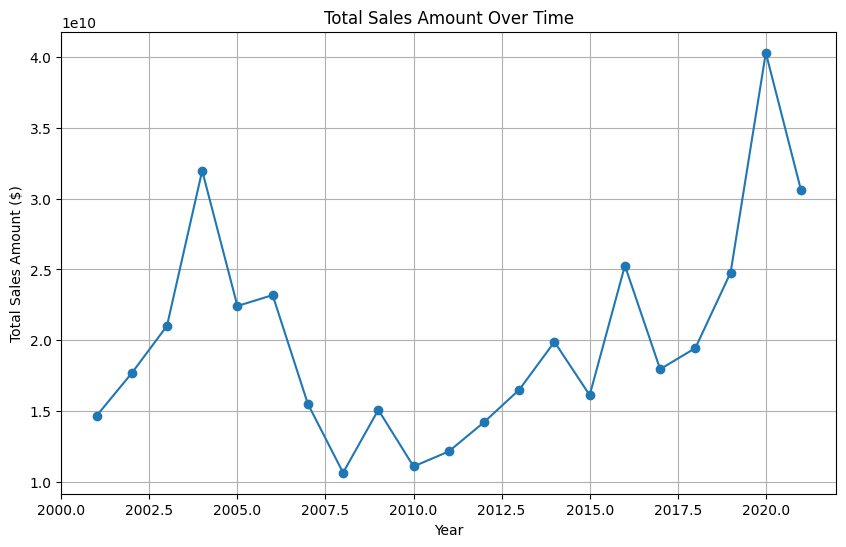

In [27]:
# Sales Amount Trend Over Time
plt.figure(figsize=(10, 6))
df.groupby('List Year')['Sale Amount'].sum().plot(marker='o')
plt.title('Total Sales Amount Over Time')
plt.xlabel('Year')
plt.ylabel('Total Sales Amount ($)')
plt.grid(True)
plt.show()

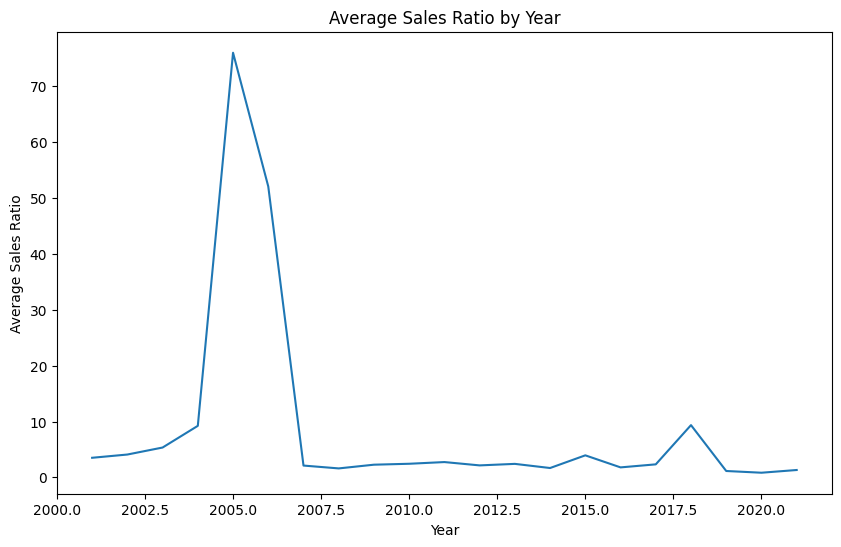

In [28]:
# Average Sales Ratio by Year
plt.figure(figsize=(10, 6))
sns.lineplot(x='List Year', y='Sales Ratio', data=df.groupby('List Year')['Sales Ratio'].mean().reset_index())
plt.title('Average Sales Ratio by Year')
plt.xlabel('Year')
plt.ylabel('Average Sales Ratio')
plt.show()

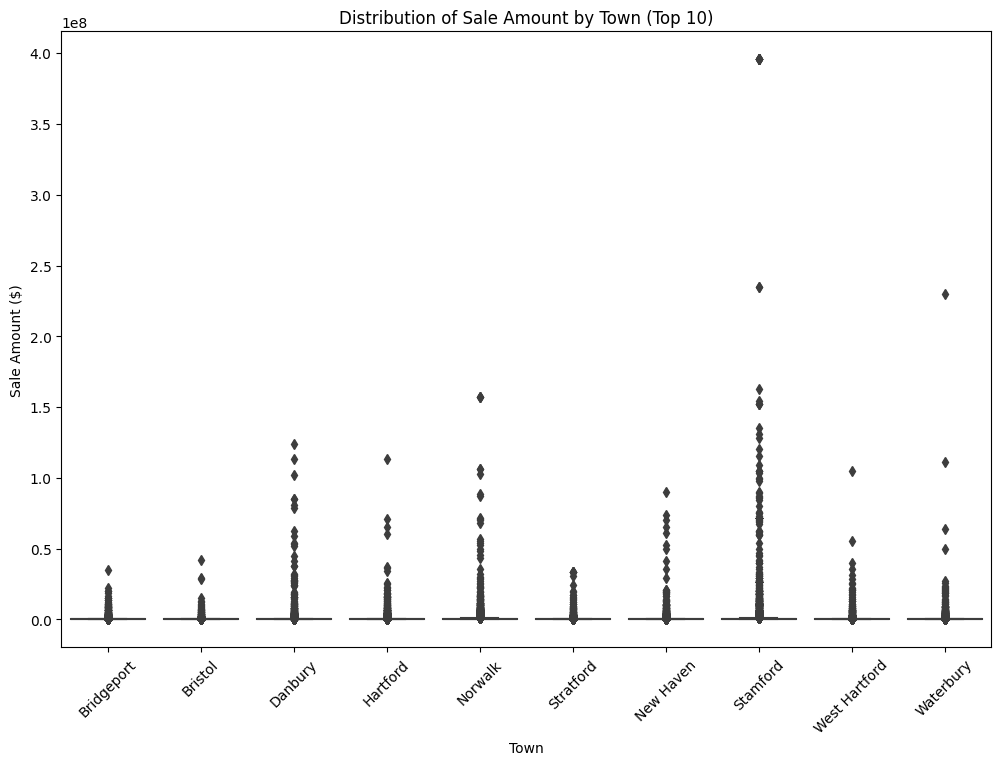

In [30]:
# Distribution of Sale Amount by Town
top_towns = df['Town'].value_counts().index[:10]
df_top_towns = df[df['Town'].isin(top_towns)]

plt.figure(figsize=(12, 8))
sns.boxplot(x='Town', y='Sale Amount', data=df_top_towns)
plt.title('Distribution of Sale Amount by Town (Top 10)')
plt.xlabel('Town')
plt.ylabel('Sale Amount ($)')
plt.xticks(rotation=45)
plt.show()

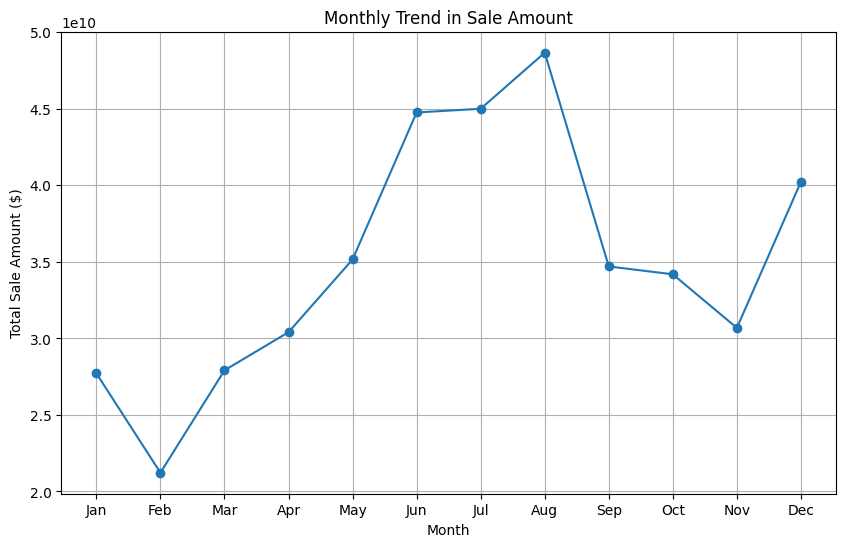

In [33]:
# Monthly Trend in Sale Amount
df['Date Recorded'] = pd.to_datetime(df['Date Recorded'])
df['Month'] = df['Date Recorded'].dt.month

plt.figure(figsize=(10, 6))
df.groupby('Month')['Sale Amount'].sum().plot(marker='o')
plt.title('Monthly Trend in Sale Amount')
plt.xlabel('Month')
plt.ylabel('Total Sale Amount ($)')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

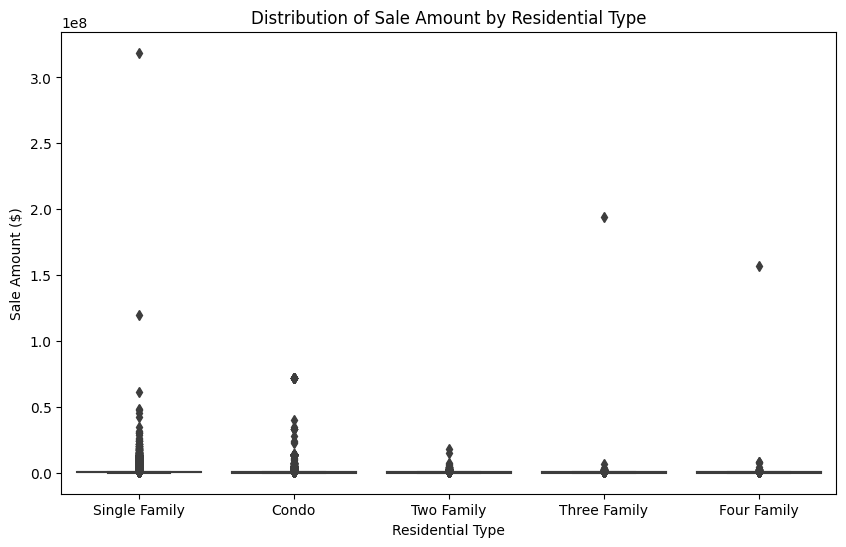

In [34]:
# Distribution of Sale Amount by Residential Type
plt.figure(figsize=(10, 6))
sns.boxplot(x='Residential Type', y='Sale Amount', data=df)
plt.title('Distribution of Sale Amount by Residential Type')
plt.xlabel('Residential Type')
plt.ylabel('Sale Amount ($)')
plt.show()

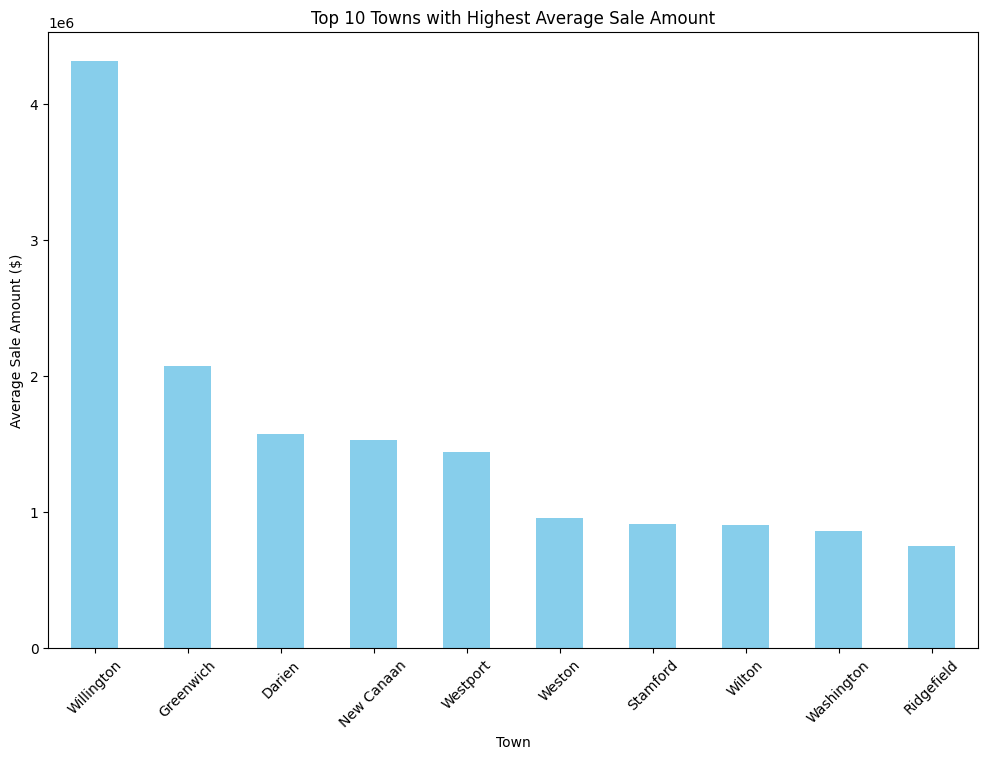

In [35]:
# Top 10 Towns with Highest Average Sale Amount
top_towns_avg_sale = df.groupby('Town')['Sale Amount'].mean().nlargest(10)

plt.figure(figsize=(12, 8))
top_towns_avg_sale.plot(kind='bar', color='skyblue')
plt.title('Top 10 Towns with Highest Average Sale Amount')
plt.xlabel('Town')
plt.ylabel('Average Sale Amount ($)')
plt.xticks(rotation=45)
plt.show()